In [15]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import os
import urllib
import sys
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [6]:
citibike = pd.read_csv('202101_citibike_tripdata.csv')

In [4]:
citibike.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

In [7]:
citibike.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,266,2021-01-01 00:03:35.5100,2021-01-01 00:08:01.7770,3273,Manila & 1st,40.721651,-74.042884,3209,Brunswick St,40.724176,-74.050656,42494,Subscriber,1988,1
1,1543,2021-01-01 00:23:32.9250,2021-01-01 00:49:16.0830,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,45343,Customer,1996,2
2,1461,2021-01-01 00:23:50.7940,2021-01-01 00:48:12.5660,3681,Grand St,40.715178,-74.037683,3213,Van Vorst Park,40.718489,-74.047727,31794,Customer,1995,1
3,793,2021-01-01 00:31:09.0770,2021-01-01 00:44:22.9430,3185,City Hall,40.717732,-74.043845,3199,Newport Pkwy,40.728745,-74.032108,42316,Customer,1969,0
4,596,2021-01-01 00:35:52.1900,2021-01-01 00:45:48.7740,3639,Harborside,40.719252,-74.034234,3209,Brunswick St,40.724176,-74.050656,32575,Customer,1969,0


In [8]:
citibike = citibike[['bikeid','starttime','stoptime','tripduration','start station id',\
              'end station id','start station name','end station name','start station latitude',\
              'start station longitude','end station latitude', \
              'end station longitude', 'usertype','birth year', 'gender']]

In [9]:
citibike

,bikeid,starttime,stoptime,tripduration,start station id,end station id,start station name,end station name,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
0,42494,2021-01-01 00:03:35.5100,2021-01-01 00:08:01.7770,266,3273,3209,Manila & 1st,Brunswick St,40.721651,-74.042884,40.724176,-74.050656,Subscriber,1988,1
1,45343,2021-01-01 00:23:32.9250,2021-01-01 00:49:16.0830,1543,3681,3213,Grand St,Van Vorst Park,40.715178,-74.037683,40.718489,-74.047727,Customer,1996,2
2,31794,2021-01-01 00:23:50.7940,2021-01-01 00:48:12.5660,1461,3681,3213,Grand St,Van Vorst Park,40.715178,-74.037683,40.718489,-74.047727,Customer,1995,1
3,42316,2021-01-01 00:31:09.0770,2021-01-01 00:44:22.9430,793,3185,3199,City Hall,Newport Pkwy,40.717732,-74.043845,40.728745,-74.032108,Customer,1969,0
4,32575,2021-01-01 00:35:52.1900,2021-01-01 00:45:48.7740,596,3639,3209,Harborside,Brunswick St,40.719252,-74.034234,40.724176,-74.050656,Customer,1969,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11619,44852,2021-01-31 20:16:05.4700,2021-01-31 20:57:22.0110,2476,3187,3483,Warren St,Montgomery St,40.721124,-74.038051,40.719420,-74.050990,Subscriber,1958,1
11620,46538,2021-01-31 21:05:05.2090,2021-01-31 21:07:32.8660,147,3186,3187,Grove St PATH,Warren St,40.719586,-74.043117,40.721124,-74.038051,Subscriber,1972,1
11621,44398,2021-01-31 21:06:23.5880,2021-01-31 21:17:23.8420,660,3211,3276,Newark Ave,Marin Light Rail,40.721525,-74.046305,40.714584,-74.042817,Subscriber,1987,2
11622,41400,2021-01-31 21:16:37.8220,2021-01-31 21:23:02.1240,384,3205,3268,JC Medical Center,Lafayette Park,40.716540,-74.049638,40.713464,-74.062859,Subscriber,1989,1


In [10]:
citibike=citibike.sort_values(by=['bikeid','starttime'])

In [11]:
citibike.head()

,bikeid,starttime,stoptime,tripduration,start station id,end station id,start station name,end station name,start station latitude,start station longitude,end station latitude,end station longitude,usertype,birth year,gender
21,19209,2021-01-01 03:10:49.0690,2021-01-01 03:57:22.1680,2793,3638,3198,Washington St,Heights Elevator,40.724294,-74.035483,40.748716,-74.040443,Customer,1969,0
332,19209,2021-01-02 12:01:57.9270,2021-01-02 12:13:52.5570,714,3198,3209,Heights Elevator,Brunswick St,40.748716,-74.040443,40.724176,-74.050656,Customer,1994,1
625,19209,2021-01-02 17:16:02.3130,2021-01-02 17:24:27.5000,505,3209,3209,Brunswick St,Brunswick St,40.724176,-74.050656,40.724176,-74.050656,Subscriber,1988,2
743,19209,2021-01-03 11:10:56.2960,2021-01-03 11:14:17.1260,200,3209,3186,Brunswick St,Grove St PATH,40.724176,-74.050656,40.719586,-74.043117,Subscriber,1984,1
838,19209,2021-01-03 16:58:54.6270,2021-01-03 17:12:03.6720,789,3186,3192,Grove St PATH,Liberty Light Rail,40.719586,-74.043117,40.711242,-74.055701,Customer,1994,1


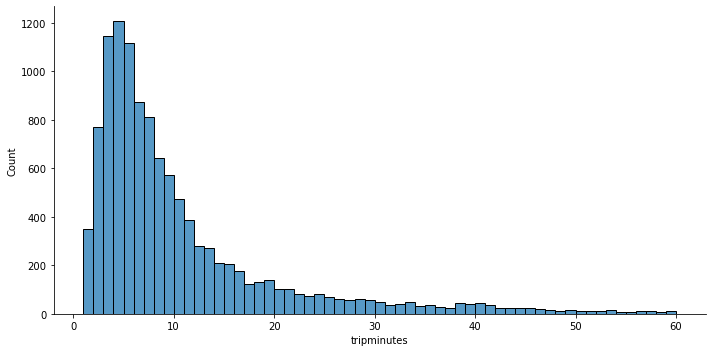

In [17]:
#Trip by minutes; it seems like most trip are happening under 10 minutes
citibike['tripminutes'] = citibike['tripduration'] // 60
sns.displot(data=citibike,x="tripminutes", bins=range(1,61), aspect=10/5);

In [20]:
citibike['starttime'] = pd.to_datetime(citibike['starttime'])
citibike['stoptime'] = pd.to_datetime(citibike['stoptime'])

In [21]:
#Hours when bike are taken
citibike['start hour']=citibike['starttime'].dt.hour
citibike['start day']=citibike['starttime'].dt.day
citibike['weekday']=citibike['starttime'].dt.weekday

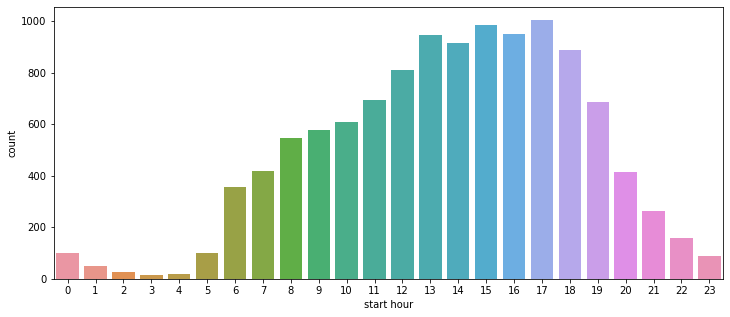

In [22]:
#This was during the pandemic, so a lot of people weren't taken bike in the morning hour compare to 2019
plt.figure(figsize=(12,5))
sns.countplot(data=citibike, x="start hour" ) ;

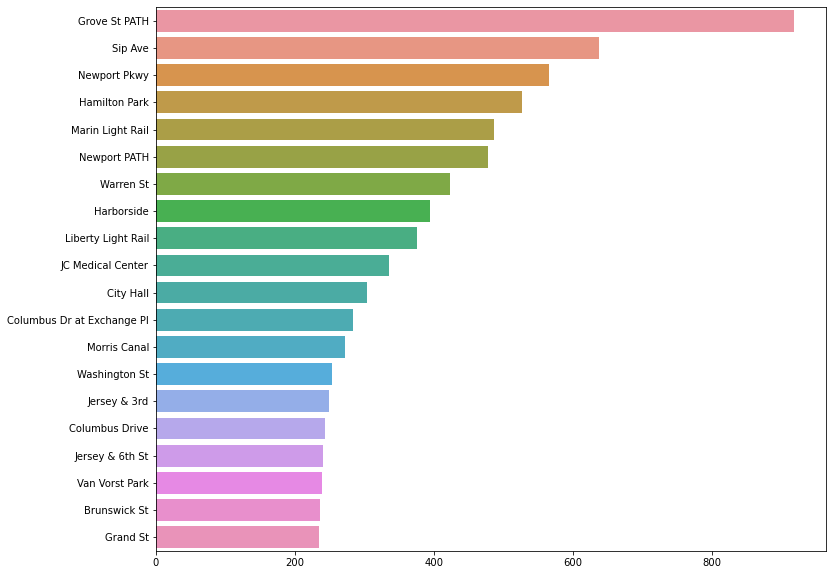

In [24]:
#Ridership by station name
startstation = citibike['start station name'].value_counts()[:20]
plt.figure(figsize=(12,10))
sns.barplot( x=startstation.values , y=list(startstation.index), 
 orient="h"  ) ;

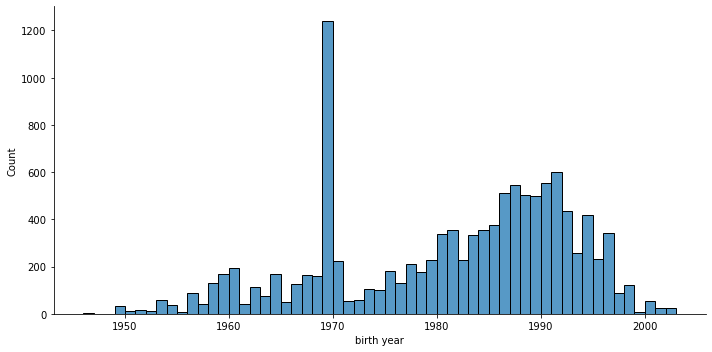

In [25]:
#Ridership by age
sns.displot(data=citibike, x="birth year" , bins=range(1946,2004),  aspect=10/5) ;

In [26]:
#Replacing empty space in column with underscore _

citibike.columns = [x.replace(' ','_') for x in citibike.columns]

In [27]:
citibike.columns

Index(['bikeid', 'starttime', 'stoptime', 'tripduration', 'start_station_id',
       'end_station_id', 'start_station_name', 'end_station_name',
       'start_station_latitude', 'start_station_longitude',
       'end_station_latitude', 'end_station_longitude', 'usertype',
       'birth_year', 'gender', 'tripminutes', 'start_hour', 'start_day',
       'weekday'],
      dtype='object')